# Density estimation ussing GMM

This is an example of techniques for density estimation ussing mixtures of Gaussians. The example uses Python classes from Scikit-learn.

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GMM
from sklearn.mixture import DPGMM
from sklearn.mixture import VBGMM

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (10,4)
colors = ['blue', 'red']
np.random.seed(42)


print(("Using the following versions\n"
       "Numpy : {}\n"
       "Scikit-learn : {}\n"
       "Matplotlib : {}\n"
       ).format(np.__version__, sklearn.__version__,
                matplotlib.__version__))

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using the following versions
Numpy : 1.11.1
Scikit-learn : 0.18.dev0
Matplotlib : 1.5.1



## Dataset: toy example

Given a dataset of independent and identically distributed observations $X = \{x_1, \dots, x_N\}$ comming from a mixture of $K$ Gaussians with unknown set of parameter values $\Theta = \{\theta_1, \dots, \theta_K\}$ where $\theta_i = \{\mu_i, \sigma_i\}$ and the latent variable $Z = \{z_1, \dots, z_N\}$ where $z_n \in \{1,\dots,K\}$ denoting which Gaussian has generated the observation $x_n$.

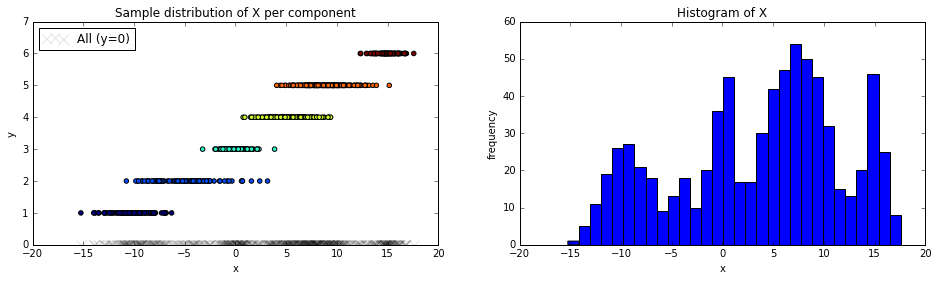

In [2]:
# Hidden or latent variables
Z = {1: (-10.0, 2.0, 100),
     2: (-5.0, 3.0, 90),
     3: (0.0, 1.0, 100),
     4: (5.0, 2.0, 150),
     5: (9.0, 2.0, 200),
     6: (15.0, 1.0, 100)}
Y = np.concatenate([np.ones(size)*y for y, (loc, scale, size) in Z.iteritems()]).reshape(-1,1)

# Observed variables
X = np.concatenate([np.random.normal(loc,scale,size) for loc, scale, size in Z.values()]).reshape(-1,1)

# A grid for the following density estimations
x_grid = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.set_title('Sample distribution of X per component')
ax1.scatter(X, Y, c=Y)
ax1.scatter(X, np.zeros_like(X), marker='x', c='black', s=100, label='All (y=0)', alpha=0.1)
ax1.set_ylim([0,len(Z)+1])
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.set_title('Histogram of X')
hist = ax2.hist(X, bins=30)
ax2.set_ylabel('frequency')
ax2.set_xlabel('x')

## Modeling the data

We want to model the previous distribution with a mixture of Gaussians. In this example we will assume that we know the original number of Gaussians $K$.

We want to find the set of parameter values $\Theta$ and the mixing coefficients $\pi = \{\pi_1, \dots, \pi_K\}$ that maximize the likelihood function

$$
p(X|\mu, \Sigma, \pi) = \prod_{n=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_n|\mu_k, \Sigma_k)
$$

Computing Gaussian Kernel Density
Computing Gaussian Mixture Model
Computing Dirichlet Process GMM
Computing Variational Bayes GMM


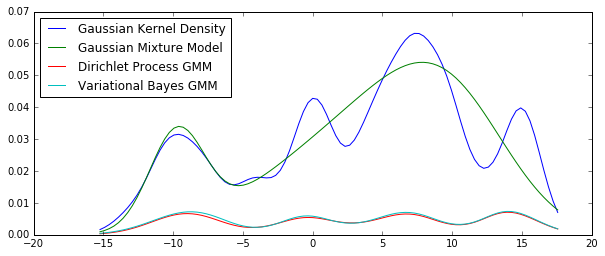

In [3]:
models = [(KernelDensity, {'kernel':'gaussian'},"Gaussian Kernel Density"),
          (GMM, {'n_components':7},"Gaussian Mixture Model"),
          (DPGMM, {'n_components':7},"Dirichlet Process GMM"),
          (VBGMM, {'n_components':7},"Variational Bayes GMM")]

fig = plt.figure()
ax = fig.add_subplot(111)
for i, (model, args, name) in enumerate(models):
    print("Computing {}".format(name))
    kde = model(**args)

    kde.fit(X)

    if model in [KernelDensity]:
        q_x = np.exp(kde.score_samples(x_grid))
    else:
        q_x = np.exp(kde.score(x_grid))

    ax.plot(x_grid, q_x, label=name)
    
ax.legend(loc='upper left')